# TEXT MINING for PRACTICE: word2vec and fasttext
- gensim 패키지를 이용하여 한글 문서의 word2vec을 구해보자
---

In [52]:
from newspaper import Article

## 1. 데이터 수집

In [22]:
texts = []

url = 'https://ko.wikipedia.org/wiki/%EA%B9%80%EC%97%B0%EC%95%84'
news = Article(url, language='ko')
news.download()
news.parse()
texts.append(news.text)


url = 'https://ko.wikipedia.org/wiki/%EC%86%90%ED%9D%A5%EB%AF%BC'
news = Article(url, language='ko')
news.download()
news.parse()
texts.append(news.text)

## 2. 토큰화

In [23]:
from konlpy.tag import Okt
okt = Okt()
# tokenizer : 문장에서 색인어 추출을 위해 명사,동사,알파벳,숫자 정도의 단어만 뽑아서 normalization, stemming 처리하도록 함
def tokenizer(raw, pos=["Noun"], stopword=["경기","선수","기록","라운드","대한민국","한국","시즌","세계","선정","편집"]):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]


In [24]:
from konlpy.tag import Kkma
kkma = Kkma()
common_texts = []

for text in texts :
    common_texts.append(tokenizer(text))

In [25]:
common_texts

[['김연아',
  '피겨',
  '스케이팅',
  '동계',
  '올림픽',
  '여자',
  '싱글',
  '부문',
  '챔피언',
  '동계',
  '올림픽',
  '여자',
  '싱글',
  '부문',
  '은메달',
  '리스트',
  '선수권',
  '챔피언',
  '최초',
  '올림픽',
  '메달리스트',
  '선수권대회',
  '메달리스트',
  '피겨스케이팅',
  '종합',
  '선수권',
  '대회',
  '우승자',
  '우승',
  '또한',
  '대륙',
  '피겨',
  '스케이팅',
  '선수권',
  '대회',
  '우승',
  '그랑프리',
  '파이널',
  '우승',
  '통해',
  '피겨',
  '스케이팅',
  '여자',
  '싱글',
  '부문',
  '국제',
  '대회',
  '동계',
  '올림픽',
  '선수권',
  '대륙',
  '선수권',
  '그랑프리',
  '파이널',
  '그랜드',
  '슬램',
  '사상',
  '최초',
  '달성',
  '선수권',
  '대회',
  '여자',
  '싱글',
  '부문',
  '사상',
  '최초',
  '돌파',
  '밴쿠버',
  '동계',
  '올림픽',
  '쇼트',
  '프로그램',
  '프리',
  '스케이팅',
  '다시',
  '최고',
  '경신',
  '선수권',
  '쇼트',
  '프로그램',
  '여자',
  '싱글',
  '부문',
  '쇼트',
  '프리',
  '모두',
  '번의',
  '최고',
  '수립',
  '자신',
  '자신',
  '경신',
  '김연아',
  '보유',
  '쇼트',
  '피겨',
  '스케이팅',
  '선수권',
  '대회',
  '일본',
  '아사다',
  '마오',
  '경신',
  '최고',
  '프리',
  '유럽',
  '피겨',
  '스케이팅',
  '선수권',
  '대회',
  '러시아',
  '니야',
  '메드베데바',
  '경신',
  '최고',
  '선수권',
  '이후',


## 3. Word2Vec 생성

In [26]:
from gensim.models import Word2Vec
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

In [27]:
model.wv.similar_by_word("김연아")

[('손흥민', 0.7773756980895996),
 ('점프', 0.776290774345398),
 ('리그', 0.7153128385543823),
 ('피겨', 0.7069342136383057),
 ('프리', 0.6911152005195618),
 ('올림픽', 0.681617796421051),
 ('승리', 0.6751697063446045),
 ('선수권', 0.6729075312614441),
 ('스핀', 0.6613260507583618),
 ('판정', 0.6594838500022888)]

In [28]:
model.wv.similar_by_word("손흥민")

[('김연아', 0.7773756980895996),
 ('점프', 0.7373931407928467),
 ('승리', 0.7139410376548767),
 ('피겨', 0.7133520245552063),
 ('미국', 0.7064438462257385),
 ('올림픽', 0.6921921372413635),
 ('스핀', 0.6741107702255249),
 ('선수권', 0.6729264259338379),
 ('이후', 0.6725685596466064),
 ('발표', 0.6720091104507446)]

In [29]:
model.wv.similar_by_word("토트넘")

[('손흥민', 0.621965765953064),
 ('스핀', 0.6196152567863464),
 ('김연아', 0.5852493047714233),
 ('점프', 0.5668530464172363),
 ('프리미어리그', 0.5603548884391785),
 ('리그', 0.5559902191162109),
 ('올림픽', 0.5523454546928406),
 ('승리', 0.5439846515655518),
 ('후반', 0.5309497117996216),
 ('체육', 0.5278471112251282)]

In [30]:
model.wv.most_similar(positive=['손흥민', '김연아'], negative=['축구'])

[('점프', 0.6915620565414429),
 ('피겨', 0.654589056968689),
 ('미국', 0.6407434940338135),
 ('프리', 0.6287806034088135),
 ('연속', 0.6016377806663513),
 ('승리', 0.6001042127609253),
 ('함부르크', 0.5981550216674805),
 ('올림픽', 0.5923317670822144),
 ('선수권', 0.5789109468460083),
 ('신기록', 0.5772507190704346)]

## 4. FastText 테스트

In [41]:
from gensim.models.fasttext import FastText
model = FastText(size=50, window=5, min_count=1)  # instantiate
model.build_vocab(sentences=common_texts)
model.train(sentences=common_texts, total_examples=len(common_texts), epochs=10)  # tr
model.wv.most_similar(positive=['손흥민', '김연아'], negative=['축구'])

[('프리스케이트', 0.9988518357276917),
 ('리그', 0.9988205432891846),
 ('스케이팅', 0.9987232089042664),
 ('스포츠', 0.9986897706985474),
 ('점프', 0.9986711144447327),
 ('프리미어리그', 0.9986151456832886),
 ('프리스케이팅', 0.9986121654510498),
 ('스케이트', 0.9985777139663696),
 ('쇼트프로그램', 0.9985766410827637),
 ('피겨스케이팅', 0.9985207319259644)]

## 5. 시각화

In [68]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

vocab = list(model.wv.vocab)[:50]
target_word = ["손흥민", "축구", "프리스케이트", "김연아"]
vocab += target_word
vocab = list(set(vocab))
X = model.wv[vocab]

tsne = TSNE(n_components=2, random_state = 5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])


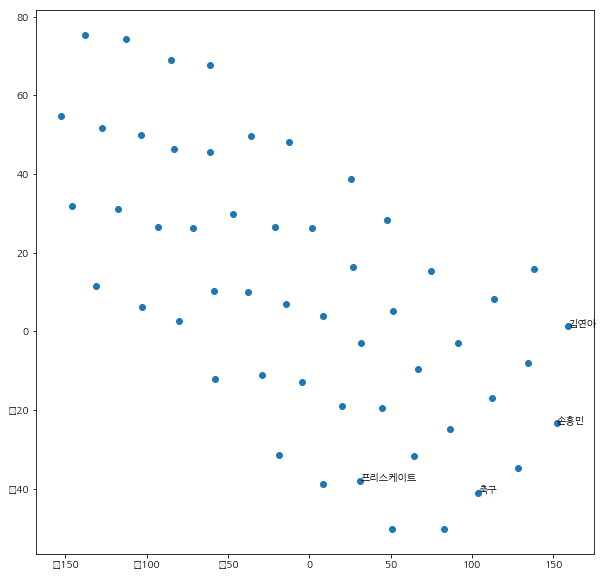

In [69]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
plt.rcParams["font.family"] = 'NanumGothic'
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    if word in target_word:
        ax.annotate(word, pos)
    else:
        ax.annotate("", pos)